In [723]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.special as sp
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

pd.options.display.float_format = '{:.5f}'.format

In [724]:
# KOSPI 200 데이터 다운로드
start_date = "2023-07-28"
end_date = "2023-10-21"
kospi_data = yf.download('^KS200', start=start_date, end=end_date)

# 일일 수익률 계산
kospi_data['Daily_Return'] = kospi_data['Close'].pct_change()

[*********************100%%**********************]  1 of 1 completed


In [725]:
vol = pd.read_csv('./dataset/corr/volatility.csv', encoding='cp949')
vol = vol[['일자', '평균내재변동성_전체', '역사적변동성_30일']]
vol['일자'] = pd.to_datetime(vol['일자'])
vol

,일자,평균내재변동성_전체,역사적변동성_30일
0,2023-10-20,18.40000,15.90000
1,2023-10-19,17.40000,15.80000
2,2023-10-18,14.30000,14.90000
3,2023-10-17,14.60000,14.90000
4,2023-10-16,15.90000,14.40000
5,2023-10-13,14.90000,14.50000
6,2023-10-12,14.50000,14.50000
7,2023-10-11,13.30000,14.70000
8,2023-10-10,15.00000,13.70000
9,2023-10-06,14.60000,13.70000


In [726]:
vkospi = pd.read_csv('./dataset/corr/VKOSPI.csv')
vkospi['날짜'] = pd.to_datetime(vkospi['날짜'])
vkospi

,날짜,종가,시가,고가,저가,거래량,변동 %
0,2023-10-24,18.82000,19.07000,20.14000,18.74000,NaN,-4.22%
1,2023-10-23,19.65000,19.92000,19.93000,19.41000,NaN,0.61%
2,2023-10-20,19.53000,19.02000,20.36000,18.95000,NaN,7.13%
3,2023-10-19,18.23000,17.34000,18.23000,17.18000,NaN,13.94%
4,2023-10-18,16.00000,16.36000,16.43000,15.90000,NaN,-1.11%
5,2023-10-17,16.18000,16.23000,16.49000,15.98000,NaN,-5.21%
6,2023-10-16,17.07000,16.92000,17.63000,16.76000,NaN,7.02%
7,2023-10-13,15.95000,16.28000,16.35000,15.93000,NaN,1.59%
8,2023-10-12,15.70000,16.21000,16.32000,15.70000,NaN,-6.21%
9,2023-10-11,16.74000,16.78000,16.82000,16.33000,NaN,-4.67%


In [727]:
df = pd.merge(vol, vkospi, left_on='일자', right_on='날짜', how='inner')
df = df[['일자', '평균내재변동성_전체', '역사적변동성_30일', '종가']]
columns = ['date', 'average_IV', 'HV_30', 'VKOSPI']
df.columns = columns

In [728]:
df

,date,average_IV,HV_30,VKOSPI
0,2023-10-20,18.40000,15.90000,19.53000
1,2023-10-19,17.40000,15.80000,18.23000
2,2023-10-18,14.30000,14.90000,16.00000
3,2023-10-17,14.60000,14.90000,16.18000
4,2023-10-16,15.90000,14.40000,17.07000
5,2023-10-13,14.90000,14.50000,15.95000
6,2023-10-12,14.50000,14.50000,15.70000
7,2023-10-11,13.30000,14.70000,16.74000
8,2023-10-10,15.00000,13.70000,17.56000
9,2023-10-06,14.60000,13.70000,17.39000


###### ======================================================
> 평균내재변동성, 역사적 변동성, vkospi 불러오기

In [729]:
ks200 = kospi_data[['Close', 'Daily_Return']]
daily_return = ks200['Daily_Return']
daily_return

Date
2023-07-28        NaN
2023-07-31    0.00462
2023-08-01    0.01557
2023-08-02   -0.02051
2023-08-03   -0.00657
2023-08-04   -0.00085
2023-08-07   -0.00460
2023-08-08   -0.00509
2023-08-09    0.01083
2023-08-10   -0.00337
2023-08-11   -0.00435
2023-08-14   -0.00782
2023-08-16   -0.01501
2023-08-17   -0.00317
2023-08-18   -0.00548
2023-08-21    0.00128
2023-08-22    0.00262
2023-08-23   -0.00167
2023-08-24    0.01419
2023-08-25   -0.01069
2023-08-28    0.00690
2023-08-29    0.00370
2023-08-30    0.00354
2023-08-31   -0.00057
2023-09-01    0.01055
2023-09-04    0.00810
2023-09-05   -0.00214
2023-09-06   -0.00717
2023-09-07   -0.00329
2023-09-08   -0.00101
2023-09-11    0.00351
2023-09-12   -0.00604
2023-09-13    0.00134
2023-09-14    0.01548
2023-09-15    0.01111
2023-09-18   -0.01249
2023-09-19   -0.00543
2023-09-20   -0.00021
2023-09-21   -0.01686
2023-09-22   -0.00306
2023-09-25   -0.00133
2023-09-26   -0.01411
2023-09-27   -0.00058
2023-10-04   -0.02222
2023-10-05   -0.00272
2023-

In [730]:
mean_list = []
k = 20
for i in range(1, len(ks200) + 1):
	sample_list = []
	sample_list = ks200['Daily_Return'][i:i+k]
	print(sample_list)
	sample_mean = round(np.mean(sample_list), 5)
	mean_list.append(sample_mean)
print(mean_list)

Date
2023-07-31    0.00462
2023-08-01    0.01557
2023-08-02   -0.02051
2023-08-03   -0.00657
2023-08-04   -0.00085
2023-08-07   -0.00460
2023-08-08   -0.00509
2023-08-09    0.01083
2023-08-10   -0.00337
2023-08-11   -0.00435
2023-08-14   -0.00782
2023-08-16   -0.01501
2023-08-17   -0.00317
2023-08-18   -0.00548
2023-08-21    0.00128
2023-08-22    0.00262
2023-08-23   -0.00167
2023-08-24    0.01419
2023-08-25   -0.01069
2023-08-28    0.00690
Name: Daily_Return, dtype: float64
Date
2023-08-01    0.01557
2023-08-02   -0.02051
2023-08-03   -0.00657
2023-08-04   -0.00085
2023-08-07   -0.00460
2023-08-08   -0.00509
2023-08-09    0.01083
2023-08-10   -0.00337
2023-08-11   -0.00435
2023-08-14   -0.00782
2023-08-16   -0.01501
2023-08-17   -0.00317
2023-08-18   -0.00548
2023-08-21    0.00128
2023-08-22    0.00262
2023-08-23   -0.00167
2023-08-24    0.01419
2023-08-25   -0.01069
2023-08-28    0.00690
2023-08-29    0.00370
Name: Daily_Return, dtype: float64
Date
2023-08-02   -0.02051
2023-08-03   

In [731]:
ks200['sample_mean'] = mean_list

/var/folders/y7/kjtd2q_j0c13ld5lwg5kd25r0000gn/T/ipykernel_27841/1269229196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ks200['sample_mean'] = mean_list


In [732]:
def rolling_realized_volatility(df):
    # 로그 수익률 계산
    df['LogReturn'] = np.log(df['Close']) - np.log(df['Close'].shift(1))
    
    # 롤링 기반 실현 변동성 계산
    df['RV'] = df['LogReturn'].rolling(22).apply(lambda x: np.sqrt(252 * np.sum(x**2) / 22))

    return df[['RV']]

# 각 행을 기준으로 해당 날짜의 변동성 계산
vol_df = rolling_realized_volatility(ks200)
print(vol_df)

                RV
Date              
2023-07-28     NaN
2023-07-31     NaN
2023-08-01     NaN
2023-08-02     NaN
2023-08-03     NaN
2023-08-04     NaN
2023-08-07     NaN
2023-08-08     NaN
2023-08-09     NaN
2023-08-10     NaN
2023-08-11     NaN
2023-08-14     NaN
2023-08-16     NaN
2023-08-17     NaN
2023-08-18     NaN
2023-08-21     NaN
2023-08-22     NaN
2023-08-23     NaN
2023-08-24     NaN
2023-08-25     NaN
2023-08-28     NaN
2023-08-29     NaN
2023-08-30 0.13776
2023-08-31 0.13689
2023-09-01 0.13140
2023-09-04 0.11442
2023-09-05 0.11245
2023-09-06 0.11502
2023-09-07 0.11450
2023-09-08 0.11324
2023-09-11 0.10787
2023-09-12 0.10921
2023-09-13 0.10830
2023-09-14 0.11716
2023-09-15 0.11181
2023-09-18 0.11915
2023-09-19 0.11912
2023-09-20 0.11905
2023-09-21 0.13193
2023-09-22 0.13221
2023-09-25 0.12340
2023-09-26 0.12735
2023-09-27 0.12521
2023-10-04 0.14597
2023-10-05 0.14577
2023-10-06 0.14581
2023-10-10 0.14143
2023-10-11 0.15087
2023-10-12 0.15659
2023-10-13 0.15793
2023-10-16 0

/var/folders/y7/kjtd2q_j0c13ld5lwg5kd25r0000gn/T/ipykernel_27841/3103856483.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LogReturn'] = np.log(df['Close']) - np.log(df['Close'].shift(1))
/var/folders/y7/kjtd2q_j0c13ld5lwg5kd25r0000gn/T/ipykernel_27841/3103856483.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RV'] = df['LogReturn'].rolling(22).apply(lambda x: np.sqrt(252 * np.sum(x**2) / 22))


In [733]:
vol_df = vol_df.dropna()

In [734]:
vol_df = round(vol_df * 100, 2)

In [735]:
vol_df

,RV
Date,
2023-08-30,13.78000
2023-08-31,13.69000
2023-09-01,13.14000
2023-09-04,11.44000
2023-09-05,11.25000
2023-09-06,11.50000
2023-09-07,11.45000
2023-09-08,11.32000
2023-09-11,10.79000


In [736]:
df = df[::-1]
df.head(3)

,date,average_IV,HV_30,VKOSPI
53,2023-07-31,13.30000,13.10000,14.21000
52,2023-08-01,12.90000,13.80000,14.06000
51,2023-08-02,14.90000,14.80000,15.36000


In [737]:
df = pd.merge(df, vol_df, left_on='date', right_on=vol_df.index, how='inner')

In [738]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        33 non-null     datetime64[ns]
 1   average_IV  33 non-null     float64       
 2   HV_30       33 non-null     float64       
 3   VKOSPI      33 non-null     float64       
 4   RV          33 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 1.4 KB


In [739]:
df = df.set_index('date', drop=True)

In [740]:
df = df[['RV', 'average_IV', 'HV_30', 'VKOSPI']]

In [741]:
pct_df = df.pct_change()*100
pct_df

,RV,average_IV,HV_30,VKOSPI
date,,,,
2023-08-30,NaN,NaN,NaN,NaN
2023-08-31,-0.65312,-4.91803,0.00000,-2.06897
2023-09-01,-4.01753,-5.17241,3.07692,-1.95618
2023-09-04,-12.93760,0.00000,1.49254,-0.31923
2023-09-05,-1.66084,6.36364,-0.73529,-0.56045
2023-09-06,2.22222,0.00000,0.74074,0.32206
2023-09-07,-0.43478,-2.56410,-2.94118,1.84591
2023-09-08,-1.13537,-2.63158,-4.54545,-2.28526
2023-09-11,-4.68198,10.81081,0.79365,0.16129


In [742]:
pct_df = pct_df.dropna()

In [743]:
std = StandardScaler()
data = std.fit_transform(df)

scaled_df = pd.DataFrame(data, columns=df.columns)

scaled_df

,RV,average_IV,HV_30,VKOSPI
0,0.18483,-0.40805,-0.26675,-0.65813
1,0.14157,-0.70185,-0.26675,-0.78017
2,-0.12278,-0.99564,0.07846,-0.89317
3,-0.93987,-0.99564,0.25106,-0.91125
4,-1.03119,-0.65288,0.16476,-0.94289
5,-0.91103,-0.65288,0.25106,-0.92481
6,-0.93506,-0.79978,-0.09415,-0.82085
7,-0.99755,-0.94668,-0.61196,-0.95193
8,-1.25228,-0.35908,-0.52566,-0.94289
9,-1.18980,-0.40805,-0.52566,-0.95193


In [752]:
corr = scaled_df.corr(method='pearson')
corr

,RV,average_IV,HV_30,VKOSPI
RV,1.00000,0.86591,0.85696,0.87081
average_IV,0.86591,1.00000,0.80458,0.95158
HV_30,0.85696,0.80458,1.00000,0.76047
VKOSPI,0.87081,0.95158,0.76047,1.00000


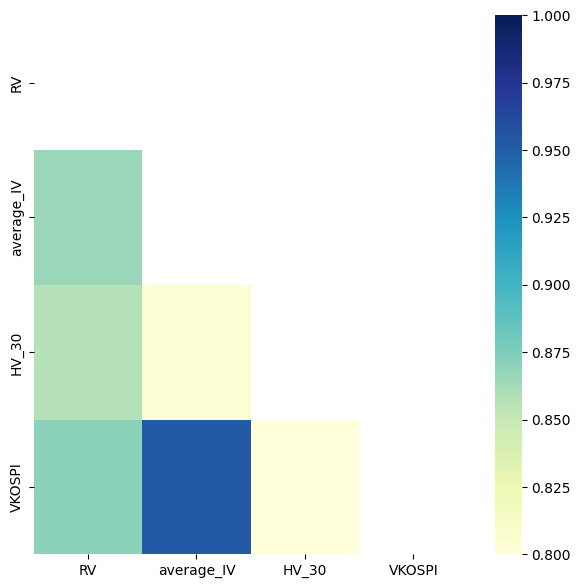

In [755]:
fig, ax = plt.subplots(figsize=(7, 7))

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, cmap='YlGnBu', vmin = 0.8, vmax = 1)   # 컬러바 범위 -1 ~ 1)

#sns.heatmap(scaled_df.corr(method='pearson'), mask=mask, annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()

In [745]:
scaled_df.describe()

,RV,average_IV,HV_30,VKOSPI
count,33.00000,33.00000,33.00000,33.00000
mean,-0.00000,0.00000,0.00000,0.00000
std,1.01550,1.01550,1.01550,1.01550
min,-1.25228,-1.33841,-1.82018,-1.25476
25%,-0.91103,-0.75081,-0.61196,-0.89317
50%,-0.12278,-0.40805,-0.09415,-0.24682
75%,0.57895,0.76713,0.42366,0.75661
max,2.35251,2.62785,2.23600,2.27079


In [746]:
df.describe()

,RV,average_IV,HV_30,VKOSPI
count,33.00000,33.00000,33.00000,33.00000
mean,13.39545,13.03333,13.30909,14.50606
std,2.11282,2.07390,1.17669,2.24672
min,10.79000,10.30000,11.20000,11.73000
25%,11.50000,11.50000,12.60000,12.53000
50%,13.14000,12.20000,13.20000,13.96000
75%,14.60000,14.60000,13.80000,16.18000
max,18.29000,18.40000,15.90000,19.53000


In [747]:
result_df = pd.DataFrame(columns=['Column', 'R-squared', 'RMSE'])

# 'RV' 열을 기준으로 각 열과 회귀 모델 생성 및 평가
for col in ['average_IV', 'HV_30', 'VKOSPI']:
    # 독립 변수(X)와 종속 변수(y) 설정
    X = scaled_df[['RV']]
    y = scaled_df[col]
    
    # 회귀 모델 생성
    model = LinearRegression()
    model.fit(X, y)
    
    # 예측
    y_pred = model.predict(X)
    
    # 결정계수 계산
    r_squared = r2_score(y, y_pred)
    
    # RMSE 계산
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    
    # 결과를 데이터프레임에 추가
    result_df = pd.concat([result_df, pd.DataFrame({'Column': [col], 'R-squared': [r_squared], 'RMSE': [rmse]})], ignore_index=True)

# 결과 출력
print(result_df)


       Column  R-squared    RMSE
0  average_IV    0.74980 0.50020
1       HV_30    0.73437 0.51539
2      VKOSPI    0.75831 0.49162


In [748]:
len(vol_df)

33